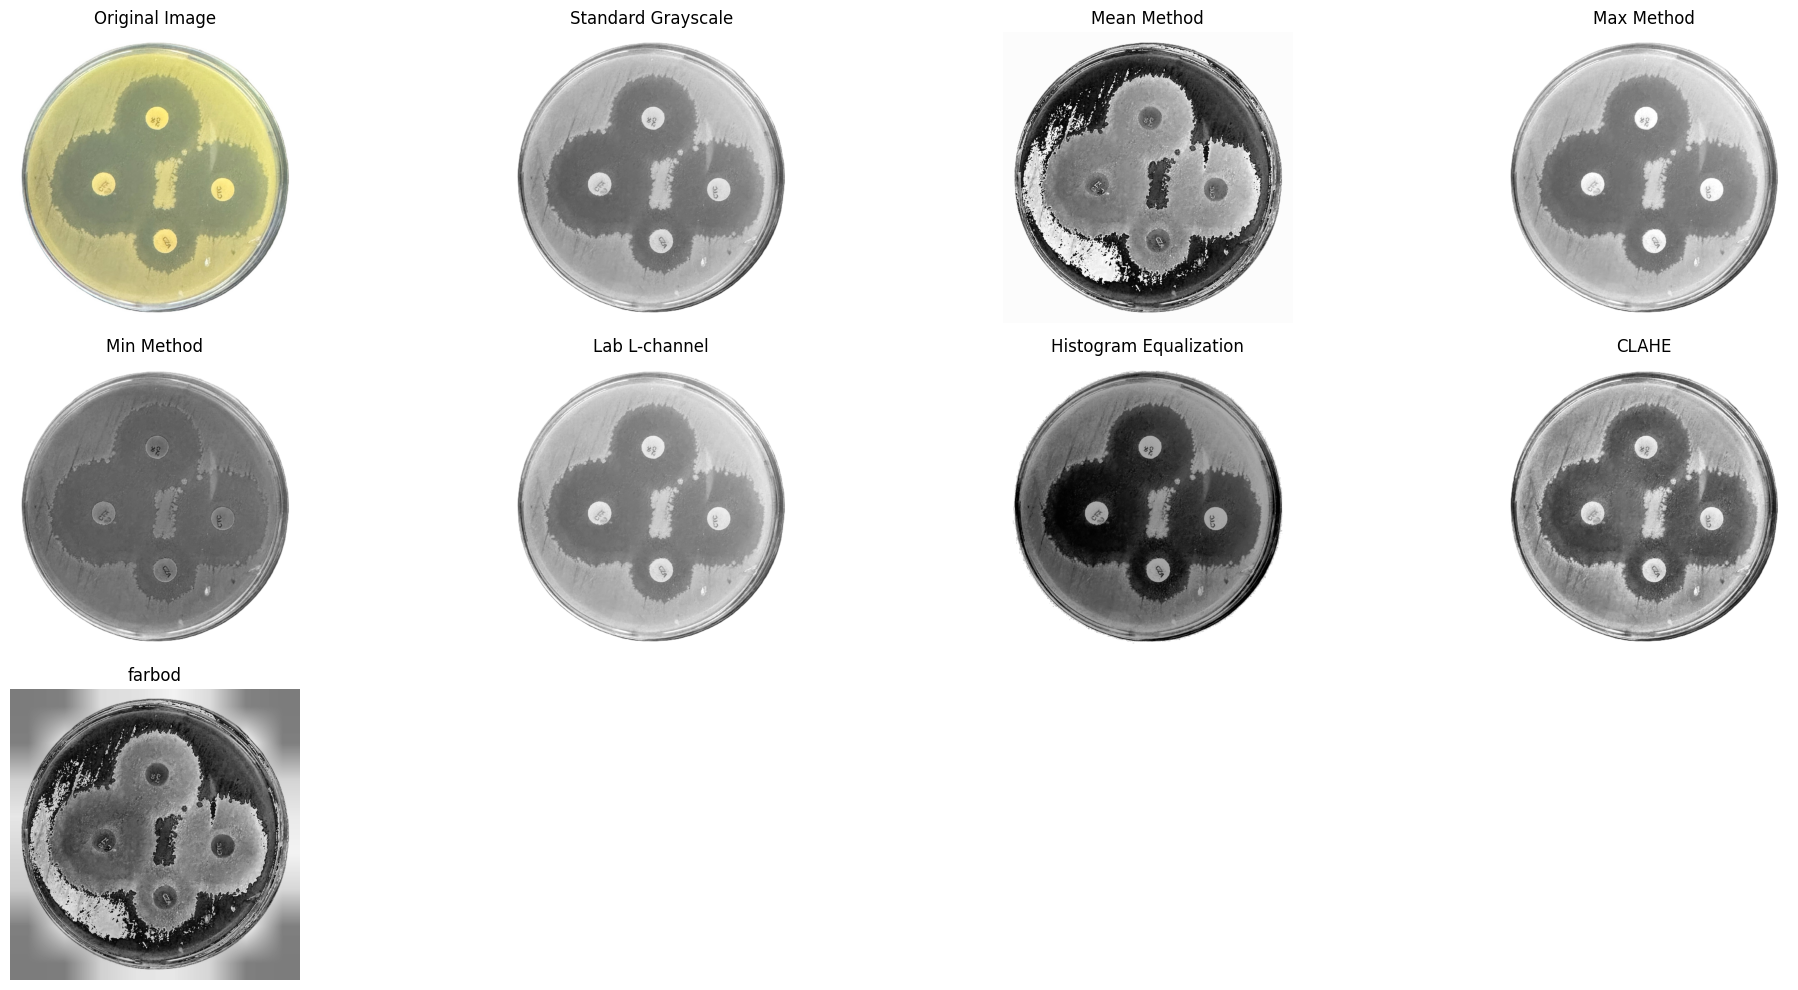

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('r3.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray_standard = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

gray_mean = cv2.convertScaleAbs((image[:,:,0] + image[:,:,1] + image[:,:,2]) / 3)

gray_max = cv2.convertScaleAbs(np.max(image, axis=2))

gray_min = cv2.convertScaleAbs(np.min(image, axis=2))

lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)
gray_lab = lab_image[:,:,0]

hist_eq = cv2.equalizeHist(gray_standard)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray_clahe = clahe.apply(gray_standard)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
farbod = clahe.apply(gray_mean)
titles = ['Original Image', 'Standard Grayscale', 'Mean Method', 'Max Method', 
          'Min Method', 'Lab L-channel', 'Histogram Equalization', 'CLAHE','farbod']
images = [image_rgb, gray_standard, gray_mean, gray_max, 
          gray_min, gray_lab, hist_eq, gray_clahe,farbod]

plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(3, 4, i + 1)
    if len(images[i].shape) == 2:
        plt.imshow(images[i], cmap='gray')
    else: 
        plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
